In [152]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

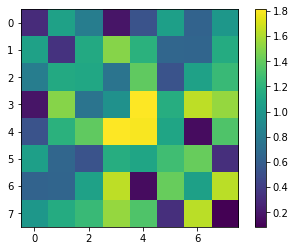

In [153]:
N_qubits = 3

#### for a unistocastic matrix
t = 1.0
A = np.random.uniform(0,1, size=(2**(N_qubits),2**(N_qubits)))
B = np.random.uniform(0,1, size=(2**(N_qubits),2**(N_qubits)))

H = np.zeros((2**N_qubits,2**N_qubits), dtype=complex)

H = A + 1j*B
H = H + np.conjugate(H).T

U = expm(1j*H*t)

plt.imshow(np.abs(H))
plt.colorbar()
plt.show()

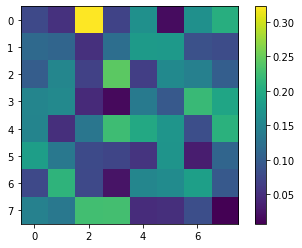

In [154]:
#### for a random probability matrix

M = np.zeros((2**N_qubits,2**N_qubits))
for i in range(2**N_qubits):
    col = np.random.uniform(0,1, size=(2**N_qubits))
    M[:,i] = col/sum(col)

plt.imshow(np.abs(M))
plt.colorbar()
plt.show()

In [155]:
def prob_matrix_check(matrix, decimals):
    col = [np.round(sum(matrix[:,i]), decimals=decimals)==1 for i in range(len(matrix))]
    row = [np.round(sum(matrix[i,:]), decimals=decimals)==1 for i in range(len(matrix))]

    if all(col):
        if all(row):
            return True, True
        else:
            return False, True
    elif all(row):
        return True, False
    return False, False


In [156]:
print("row, col:")
print(prob_matrix_check(np.abs(U)**2, decimals=4))
print(prob_matrix_check(M, decimals=4))

row, col:
(True, True)
(False, True)


In [157]:
C = np.sqrt(M)

row, col:
0 (False, False)
1 (False, False)
2 (False, False)


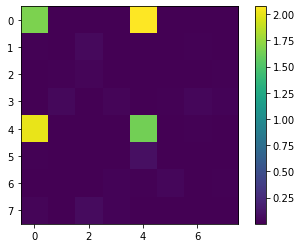

3 (False, False)
4 (False, False)
5 (False, False)
6 (False, False)
7 (False, False)
8 (False, False)
9 (False, False)
10 (False, False)
11 (False, False)
12 (False, False)
13 (False, False)
14 (False, False)
15 (False, False)
16 (False, False)
17 (False, True)
18 (False, False)
19 (False, False)
20 (False, False)
21 (False, False)
22 (False, False)
23 (False, True)
24 (False, False)
25 (False, True)
26 (False, True)


In [158]:
from qiskit.ignis.verification.tomography import state_tomography_circuits
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Operator

qr_basi = QuantumRegister(N_qubits)
qc_basi = QuantumCircuit(qr_basi)
tomography_basis = state_tomography_circuits(qc_basi, qr_basi)

print("row, col:")

for i, basis in enumerate(tomography_basis):
    basis.remove_final_measurements()
    # building the unitary matrix of the basis and the inverse.
    base_matrix_amplitudes = Operator(basis)
    base_matrix_amplitudes_inverse = base_matrix_amplitudes.transpose().conjugate()
    # building the probability matrices.
    base_matrix = np.abs(base_matrix_amplitudes)**2
    base_matrix_inverse = np.abs(base_matrix_amplitudes_inverse)**2

    C_basis_NIC = np.abs(np.linalg.multi_dot([base_matrix_amplitudes, C,  base_matrix_amplitudes_inverse]))**2
    #C_basis_NIC = np.linalg.multi_dot([base_matrix, C,  base_matrix_inverse])
    #C_basis_NIC = np.abs(np.dot(base_matrix_amplitudes, C_NIC))**2
    
    print(i, prob_matrix_check(C_basis_NIC, decimals=4))

    if i == 2:
        plt.imshow(np.abs(C_basis_NIC))
        plt.colorbar()
        plt.show()
